In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
df_index = pd.read_csv("economic_multilinear_regression.csv")



In [3]:
df_index.head()

,Year,Month,Interest_Rate,Employment_Rate,Index_Price
0,2012,3,1.831365,88.463353,2767.885904
1,2015,5,4.186420,66.147772,2242.457681
2,2000,3,5.966346,89.217687,2527.402592
3,2003,1,1.302626,85.850577,2669.976427
4,2003,4,9.720656,68.595229,2071.372640


In [4]:
df_index.drop(columns=["Year", "Month"], axis = 1, inplace=True)


In [5]:
df_index.head()

,Interest_Rate,Employment_Rate,Index_Price
0,1.831365,88.463353,2767.885904
1,4.186420,66.147772,2242.457681
2,5.966346,89.217687,2527.402592
3,1.302626,85.850577,2669.976427
4,9.720656,68.595229,2071.372640


In [6]:
df_index.isnull().sum()

Interest_Rate      0
Employment_Rate    0
Index_Price        0
dtype: int64

E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


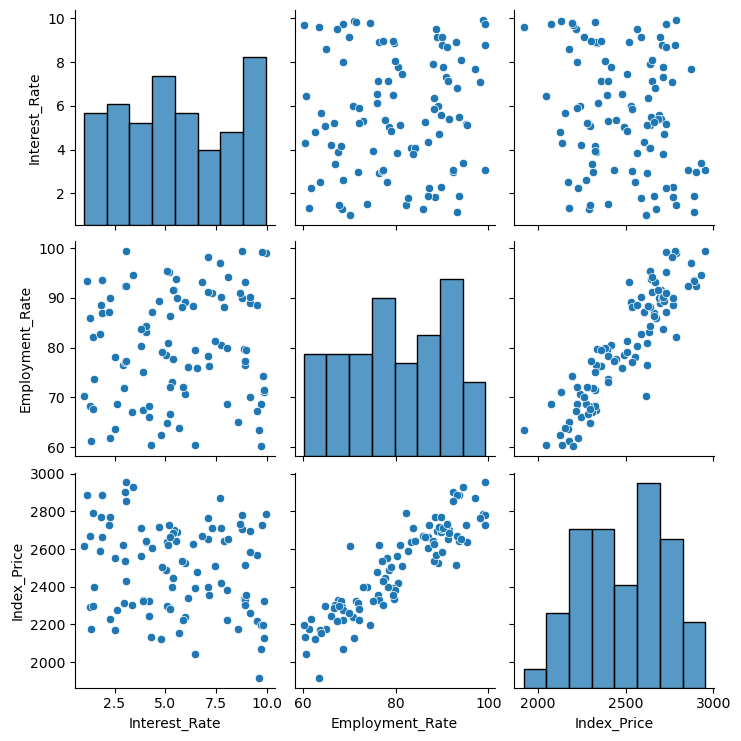

In [7]:
## Lets do some visualiation
import seaborn as sns

sns.pairplot(df_index)

In [8]:
df_index.corr()

,Interest_Rate,Employment_Rate,Index_Price
Interest_Rate,1.000000,0.087644,-0.214741
Employment_Rate,0.087644,1.000000,0.902506
Index_Price,-0.214741,0.902506,1.000000


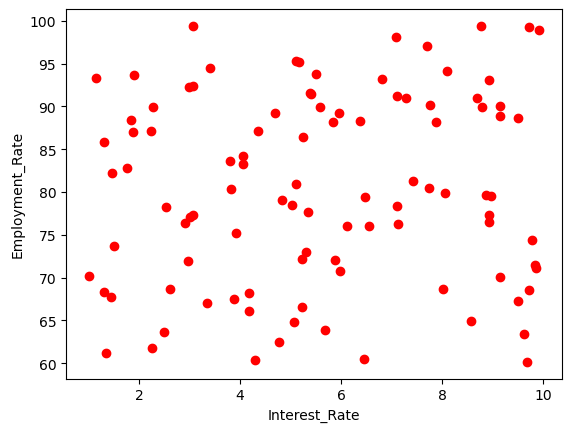

In [9]:
## Visualise this more clearly
plt.scatter(df_index['Interest_Rate'], df_index['Employment_Rate'] ,color='r')
plt.xlabel("Interest_Rate")
plt.ylabel("Employment_Rate")
plt.show()

In [10]:
X = df_index.iloc[:,:-1] # Telling us to take all the rows and columns except the last one
y = df_index.iloc[:,-1] # Telling the program to take only the last row and column

In [11]:
y.head()

0    2767.885904
1    2242.457681
2    2527.402592
3    2669.976427
4    2071.372640
Name: Index_Price, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)

In [13]:
X_train 

,Interest_Rate,Employment_Rate
73,5.307367,73.012412
20,2.501628,63.703847
65,1.507765,73.744220
15,5.223243,66.598355
11,5.833203,88.178970
...,...,...
29,1.455293,82.225970
72,7.694511,97.048517
39,2.615412,68.736114
26,9.843175,71.476602


<Axes: xlabel='Interest_Rate', ylabel='Index_Price'>

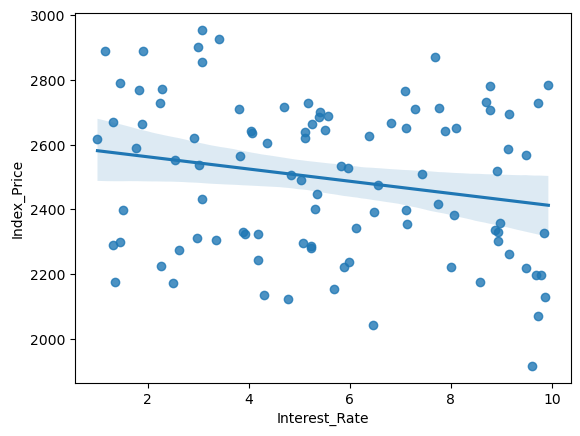

In [14]:
sns.regplot(x = 'Interest_Rate', y = 'Index_Price', data = df_index)

<Axes: xlabel='Interest_Rate', ylabel='Employment_Rate'>

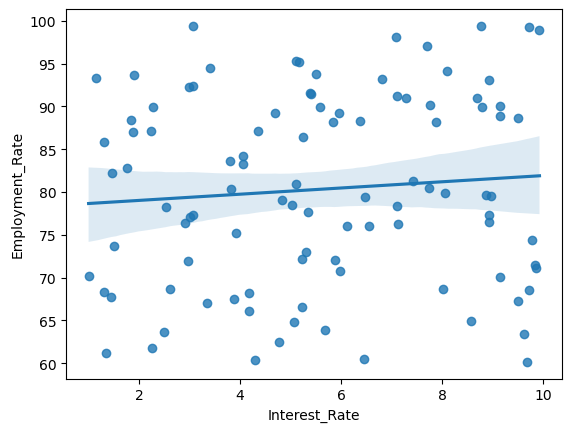

In [15]:
sns.regplot(x = 'Interest_Rate', y = 'Employment_Rate', data = df_index)

In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)


In [18]:
X_train


array([[-0.14601878, -0.66805287],
       [-1.18074988, -1.47559829],
       [-1.54727736, -0.60456638],
       [-0.17704308, -1.2244912 ],
       [ 0.04790466,  0.64769061],
       [-0.69943559,  0.25716671],
       [-1.40405491,  1.11946792],
       [ 1.27397214, -0.92722757],
       [-1.27908569,  0.5537808 ],
       [ 0.09700682,  0.73780234],
       [-1.62426745, -1.07111839],
       [ 1.5593443 ,  1.5838742 ],
       [ 1.18962165, -0.36940724],
       [-0.52141175, -1.76485372],
       [-0.0473775 ,  0.79523994],
       [-0.55941381, -1.26358056],
       [ 1.13411564,  1.62125991],
       [-1.26566489,  0.7955357 ],
       [-0.00955368, -1.46187937],
       [-1.62293081,  0.44569569],
       [ 1.19154952, -0.29731334],
       [-0.96867542,  1.61882096],
       [ 1.1682744 , -0.08868921],
       [-1.02958733, -0.3724619 ],
       [-0.49554041,  0.5532654 ],
       [ 1.50626493, -0.55020382],
       [ 1.0573069 , -1.36373248],
       [-1.60987244, -1.69124249],
       [ 1.26735677,

In [19]:
X_test

array([[-0.21997252, -1.75413399],
       [-0.09152555,  0.16182638],
       [ 1.69447479, -1.65725264],
       [-0.89912122, -0.21656195],
       [ 0.58413641,  1.42795329],
       [ 1.64699499, -1.26184239],
       [-0.50886367,  0.50173063],
       [ 0.82964266,  0.19865939],
       [ 1.50635908,  0.98161993],
       [-0.09193578,  1.64903179],
       [-0.57294705, -1.24180493],
       [-0.20081945, -0.03790577],
       [ 1.78920894, -0.86639757],
       [-0.92826016,  1.33653775],
       [ 1.36487287,  1.09442103],
       [-1.71633067, -0.95255032],
       [ 1.73548342, -1.12382009],
       [ 0.2161716 , -0.76288095],
       [-0.25089096,  1.02152489],
       [-1.41265495,  0.34704095],
       [-1.10737313, -0.12635911],
       [-0.55981631, -0.44240364],
       [-0.46138668, -1.16539329],
       [ 0.70797229, -0.32996383],
       [-1.37003086,  0.78554948],
       [ 0.25800942, -0.89717518],
       [-0.59897121,  0.09851973],
       [-0.507372  ,  0.39368433],
       [-0.89991394,

In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [21]:

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(regression, X_train, y_train, scoring="neg_mean_squared_error", 
                           cv = 5)

In [25]:
val_score


array([-4980.00448361, -3493.85558407, -2682.29915213, -4178.64674465,
       -9402.00105439])

In [26]:
np.mean(val_score)

-4947.361403772772

In [27]:
### Prediction time!!!
y_pred = regression.predict(X_test)

In [28]:
y_pred


array([2122.3194034 , 2542.35970196, 2020.67180634, 2509.78642339,
       2781.88466869, 2112.12391125, 2645.22520927, 2491.26326096,
       2622.70838185, 2874.85116539, 2259.58498888, 2504.74892893,
       2191.36597909, 2858.85892243, 2657.03791162, 2397.89079488,
       2137.27947365, 2315.82309508, 2744.80984436, 2668.85556032,
       2543.36434396, 2437.44557089, 2269.48146075, 2380.9259712 ,
       2764.13889717, 2283.10691257, 2560.89097352, 2620.9753654 ,
       2859.67221419, 2829.20146017])

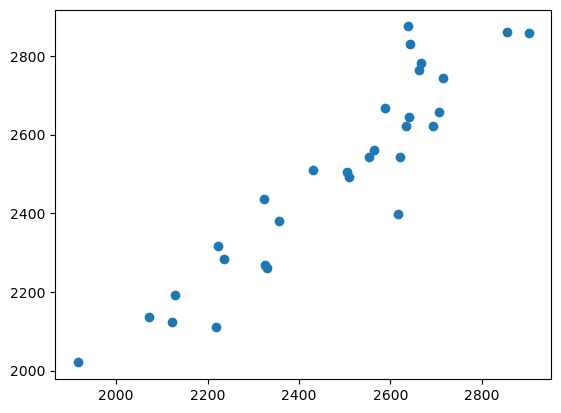

In [29]:
plt.scatter(y_test, y_pred)

In [30]:
residuals = y_test - y_pred 
print(residuals)

28     -0.776019
92     78.558811
98   -104.569534
95    -78.042796
84   -114.659781
34    105.306844
38     -4.138333
76     18.160422
17     70.515295
78   -235.724001
5      69.601969
89      1.220702
9     -63.365271
6      43.699033
22     48.753570
87    219.831306
4     -65.906834
70    -92.847134
23    -28.648476
64    -79.666042
40      9.575894
85   -114.807721
14     55.391091
63    -25.136181
8    -101.898420
56    -46.412095
97      3.658379
36     13.673532
81     -5.435897
47   -185.623913
Name: Index_Price, dtype: float64


E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


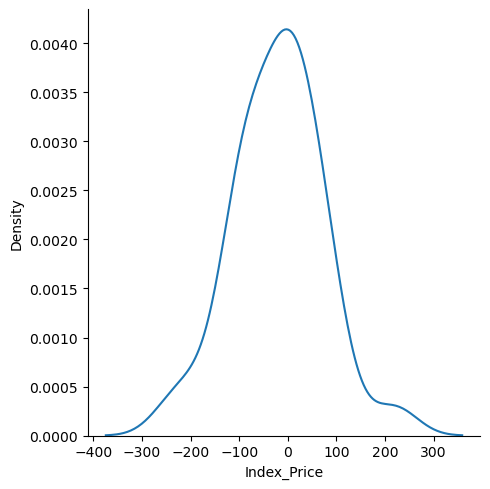

In [31]:
sns.displot(residuals, kind = 'kde')

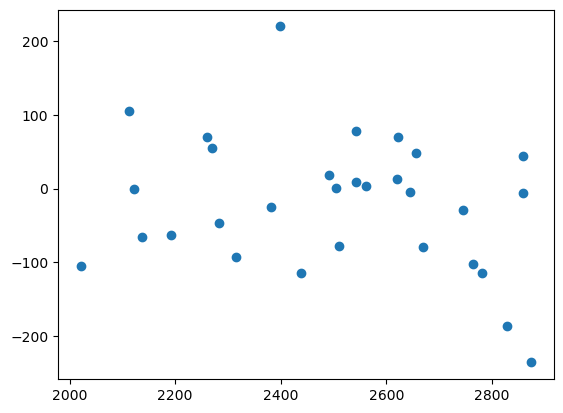

In [32]:
plt.scatter(y_pred, residuals)

In [33]:
print(regression.coef_)

[-64.40785253 223.55018341]
